In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
tit = pd.read_csv('train.csv')

In [78]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
tit.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mrs. William Thompson (Edith Junkins)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [80]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


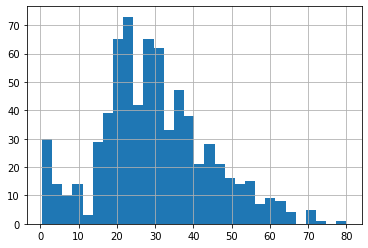

In [81]:
tit['Age'].hist(bins=30)

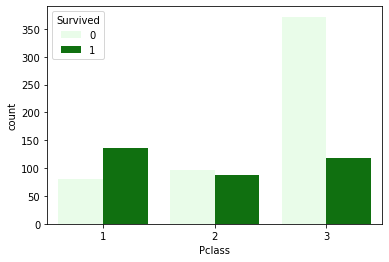

In [82]:
sns.countplot(tit['Pclass'],hue=tit['Survived'], color='green')

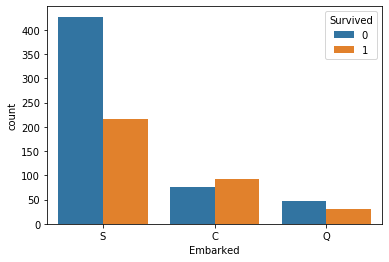

In [83]:
sns.countplot(tit['Embarked'],hue=tit['Survived'])

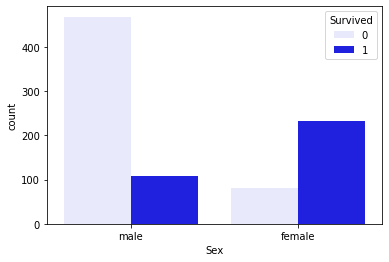

In [84]:
sns.countplot(tit['Sex'],hue=tit['Survived'], color='blue')

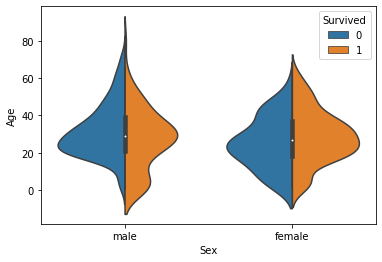

In [85]:
sns.violinplot(data=tit, x='Sex', y='Age', hue='Survived', split=True)

In [86]:
# dropping variables which are not useful in model building

tit.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [87]:
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


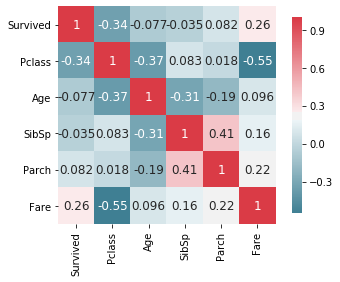

In [88]:
corr = tit.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 },  annot = True, annot_kws = { 'fontsize' : 12 })

In [89]:
tit.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [90]:
# 'Age' has 177 missing values 
# filling missing values in 'Age' with mean 


tit['Age'].fillna(tit['Age'].mean(),inplace=True)

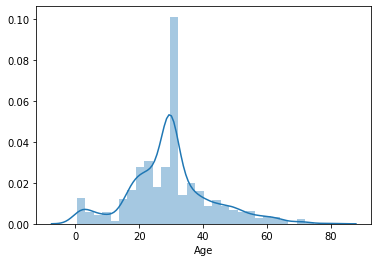

In [91]:
sns.distplot(tit['Age'])

In [92]:
# 'Embarked' has 2 missing values 
#  would be okay to fill with mode of 'Embarked'

tit['Embarked'].fillna(tit['Embarked'].mode()[0],inplace=True)

In [93]:
# 'Cabin' variable has 687 null values out of 891
#  dropping 'Cabin Column'

tit.drop('Cabin',axis=1,inplace=True)

In [94]:
tit.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [95]:
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [96]:
tit.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [97]:
tit.shape

(891, 8)

In [98]:
# dummy variable

tit_ = pd.get_dummies(tit)

tit_.shape

(891, 11)

In [99]:
tit_.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


# splitting dependent and independent variable

In [100]:
x = tit_.iloc[:,1:]

y = tit_.iloc[:,0]

In [101]:
print(x.shape,y.shape)

(891, 10) (891,)


splitting into train and test data

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [118]:
from sklearn.ensemble import RandomForestClassifier

rfc  = RandomForestClassifier()

param_grid = { 'n_estimators':[10,20,30,50], 'max_depth':[3,4,5,6]}
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(rfc, param_grid, cv=5, verbose=1)

gscv.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 20, 30, 50]},
             verbose=1)

In [119]:
gscv.best_params_

{'max_depth': 6, 'n_estimators': 20}

In [120]:

rfc1 = RandomForestClassifier(**gscv.best_params_)

rfc1.fit(x_train,y_train)
y_pred = rfc1.predict(x_test)

print('\n confusion matrix \n = ',confusion_matrix(y_test,y_pred))
print('\n classification_report \n = ',classification_report(y_test,y_pred))
print('\n accuracy = ',accuracy_score(y_test,y_pred))


 confusion matrix 
 =  [[147  12]
 [ 33  76]]

 classification_report 
 =                precision    recall  f1-score   support

           0       0.82      0.92      0.87       159
           1       0.86      0.70      0.77       109

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.83      0.83       268


 accuracy =  0.832089552238806
